#   Lending Club Case Study || Risk Analysis and Metrics</font>

Introduction:  Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk.


Purposed: The objective of this assigment is to analysed the risk in banking and financial services and  understand how data is used to minimise the risk of losing money while lending to customers.

By: * Ruchin Chaudhary. 

# Part 1: Data Load.

- Import all required libraries <br> 
- Import loan datafile i.e. loan.csv.
- Imported data is correct and there is not junk values. 

In [1]:
import numpy as np                                                # import numpy as np
import pandas as pd                                               # import pandas as pd
import matplotlib.pyplot as plt                                   # import matplotlib
import seaborn as sns                                             # import seaborn lib

df_loan = pd.read_csv("loan.csv", sep=",",                        # Reading and load loan file into df.
                      encoding = "ISO-8859-1",
                      low_memory=False)   
df_loan_master = df_loan.set_index('id')                          # Set df index.

# Part 2: Data Cleaning.

- Analysed column missing value's. 
- Check NaN values in Loan dataframe.
- Approx 12-13 column do not have any value, they are almost 100% blank. Hence those colums are dropped.


In [2]:
round(100*(df_loan_master.isnull().sum()/len(df_loan_master.index)),2) # Calc % of missing value in each column. 

member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti                                 0.00
delinq_2yrs     

### Drop fields with 100% missing values.

In [3]:
# removing column's with 100% missing values. 

df_master =  df_loan_master.drop(['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                       'mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
                       'mths_since_recent_inq','mths_since_recent_revol_delinq',
                       'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
                       'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts',
                       'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd',
                       'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq',
                       'percent_bc_gt_75','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m',
                       'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
                       'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
                       'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m',
                       'acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
                       'mths_since_last_major_derog','annual_inc_joint','dti_joint',
                       'verification_status_joint','mo_sin_old_il_acct','tot_hi_cred_lim',
                       'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
                       'mths_since_last_record','next_pymnt_d'], axis=1)

In [4]:
df_master['emp_length'].replace('< 1 year',0.6,inplace=True)        # Replace <1 year with 0.6
df_master['emp_length'].replace('1 year',1,inplace=True)             
df_master['emp_length'].replace('2 years',2,inplace=True)
df_master['emp_length'].replace('3 years',3,inplace=True)
df_master['emp_length'].replace('4 years',4,inplace=True)
df_master['emp_length'].replace('5 years',5,inplace=True)
df_master['emp_length'].replace('6 years',6,inplace=True)
df_master['emp_length'].replace('7 years',7,inplace=True)
df_master['emp_length'].replace('8 years',8,inplace=True)
df_master['emp_length'].replace('9 years',9,inplace=True)
df_master['emp_length'].replace('10 years',10,inplace=True)
df_master['emp_length'].replace('10+ years',10.5,inplace=True)     # Replace 10+ year with 10.6

df_master['emp_title'].fillna(value='NA',inplace=True)                 #Fill emp_title with NA.  
df_master['desc'].fillna(value='NA',inplace=True)                      #Fill desc with NA. 

round(100*(df_master.isnull().sum()/len(df_master.index)),2)

member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      0.00
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                           0.00
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
mths_since_last_delinq      

In [5]:
df_master['mths_since_last_delinq'].describe()                         #Describe used to define df status.

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

#### Note: `Due to marginal differnce between Mean (i.e. mean : 35.900962) and Median (i.e. 50% : 34.000000). Median was used to replaced NA/Empty data`

In [6]:
df_master['mths_since_last_delinq'].fillna(value=34.0,inplace=True)    #Fill mths_since_last_delinq with median.
df_master['collections_12_mths_ex_med'].fillna(value=0,inplace=True)   #Fill collections_12_mths_ex_med missing value with 0.
df_master['chargeoff_within_12_mths'].fillna(value=0,inplace=True)     #Fill chargeoff_within_12_mths missing value with 0.      
df_master['mths_since_last_delinq'].describe()

count    39717.000000
mean        34.671753
std         13.121107
min          0.000000
25%         34.000000
50%         34.000000
75%         34.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [7]:
round(100*(df_master.isnull().sum()/len(df_master.index)),2)

member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                          0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_delinq        0.00
open_acc            

In [8]:
df_master = df_master[~pd.isnull(df_master['emp_length'])]           # Drop null values from emp_lenght.
df_master = df_master[~pd.isnull(df_master['revol_util'])]           # Drop null value from revol_util
df_master = df_master[~pd.isnull(df_master['title'])]                # Drop null value from title
df_master = df_master[~pd.isnull(df_master['last_pymnt_d'])]         # Drop null values from last_pymnt_d.
df_master = df_master[~pd.isnull(df_master['last_credit_pull_d'])]   # Drop null values from last_credit_pull_d.
df_master = df_master[~pd.isnull(df_master['pub_rec_bankruptcies'])] # Drop null values from last_credit_pull_d.
df_master = df_master[~pd.isnull(df_master['tax_liens'])]            # Drop null values from last_credit_pull_d.                                                       

round(100*(df_master.isnull().sum()/len(df_master.index)),2)

member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
desc                          0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
mths_since_last_delinq        0.0
open_acc                      0.0
pub_rec       

In [9]:
percentage = round(100*(len(df_master.index)/len(df_loan_master.index)))      # 95% of data is retain after data cleaning.
print('Percentage of data retained :', percentage, '%' )

Percentage of data retained : 95 %


In [10]:
df_master['row_id']= range(1, 1+len(df_master))                    # Add row id to each column for plotting purpose. 

<font size="2" color ="blue" face="verdana" align =center> Assumption: Loan issue date i.e. issue_d is treated as MM/YY. Due to data quality python data function could not extrat month and year. Split function was used to get month and year.</font>

In [11]:
df_month_year = df_master['issue_d'].str.partition("-", True)     # Split issue date. 
df_master['issue_d_month']=df_month_year[0]                       # Get Month portion.
df_master['issue_d_year']='20' + df_month_year[2]                 # Include century portion.
                                                                  # Plot Graph Univerant Graph
df_master.loc[df_master['loan_amnt'] <= 4999, 'loan_catg']   = '< 5K'
df_master.loc[df_master['loan_amnt'] > 4999, 'loan_catg']   = '5K - 10k'
df_master.loc[df_master['loan_amnt'] > 9999, 'loan_catg']   = '10K - 15k'
df_master.loc[df_master['loan_amnt'] > 14999, 'loan_catg']  = '15K - 20k'
df_master.loc[df_master['loan_amnt'] > 19999, 'loan_catg']  = '20K - 25k'
df_master.loc[df_master['loan_amnt'] > 24999, 'loan_catg']  = '25K - 30k'
df_master.loc[df_master['loan_amnt'] > 29999, 'loan_catg']  = '30K - 35k'

# Populate derived field value's.    [Bi-Variant Analysis.]

- Loan Condition i.e. Good / Bad Loan.
- Income Category.
- Loan status.

In [12]:
import numpy as np
bad_loan = ["Charged Off"]                                #Getting good and bad loan. 
df_master['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
df_master['loan_condition'] = df_master['loan_status'].apply(loan_condition)
df_master['income_category'] = np.nan
lst = [df_master]
for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'
    
df_master['loan_cnt'] = df_master['loan_status'].apply(lambda x: 'Open' if x == 'Current' else 'Close')

                                                        # Average interest is 12.0%.


df_per = df_master['int_rate'].str.partition("%", True)                   #Split issue date.
df_master['intt_rate']=df_per[0]

df_master['intt_rate'] = df_master['intt_rate'].apply(pd.to_numeric, errors='coerce')
df_master['annual_inc'] = df_master['annual_inc'].apply(pd.to_numeric, errors='coerce')
   
df_master['interest_payments'] = np.nan
lst = [df_master]
for col in lst:
    col.loc[col['intt_rate'] <= 12.0, 'interest_payments'] = 'Low'
    col.loc[col['intt_rate'] > 12.0, 'interest_payments'] = 'High'

df_master['dti_statue'] = np.nan
lst = [df_master]

for col in lst:
    col.loc[col['dti'] <= 13.0, 'dti_status'] = 'Low'
    col.loc[col['dti'] > 13.0, 'dti_status'] = 'High'

In [13]:
#Prepare Dataframe for all three different type of loans.
df_charge_off = df_master[(df_master.loan_status == "Charged Off")]  
df_fully_paid = df_master[(df_master.loan_status == "Fully Paid")]  
df_current = df_master[(df_master.loan_status == "Current")] 

# Dataframe Summary. 

In [14]:
df_master.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,row_id,intt_rate,dti_statue
count,3.782500e+04,37825.000000,37825.000000,37825.000000,37825.000000,37825.000000,3.782500e+04,37825.000000,37825.000000,37825.000000,...,37825.0,37825.0,37825.0,37825.0,37825.0,37825.000000,37825.0,37825.000000,37825.000000,0.0
mean,8.598075e+05,11328.779907,11050.900198,10618.933508,327.159748,5.183162,6.967560e+04,13.377813,0.145803,0.866728,...,0.0,1.0,0.0,0.0,0.0,0.041507,0.0,18913.000000,12.070531,NaN
std,2.542923e+05,7477.278024,7205.116525,7113.288445,209.098068,3.631153,6.365015e+04,6.655779,0.490522,1.066541,...,0.0,0.0,0.0,0.0,0.0,0.200388,0.0,10919.281303,3.734364,NaN
min,8.036400e+04,500.000000,500.000000,0.000000,16.080000,0.600000,4.000000e+03,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,5.420000,NaN
25%,6.732150e+05,5600.000000,5500.000000,5000.000000,168.740000,2.000000,4.190000e+04,8.270000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,9457.000000,9.320000,NaN
50%,8.556610e+05,10000.000000,10000.000000,9200.000000,283.200000,4.000000,6.000000e+04,13.470000,0.000000,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,18913.000000,11.860000,NaN
75%,1.049089e+06,15000.000000,15000.000000,14608.709790,434.750000,9.000000,8.350000e+04,18.630000,0.000000,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,28369.000000,14.610000,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,10.500000,6.000000e+06,29.990000,11.000000,8.000000,...,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,37825.000000,24.590000,NaN


# Part 3: Loan Data Analysis

` Exploring the distribution of the loan amounts and try to identify the coorelation between different variable of dataset. `

###  Correlation Matrix.

In [15]:
df_corr = df_master.corr()                                                    #Build Correlation Matrix.
df_corr_fnl =  df_corr.drop(['collections_12_mths_ex_med',
                             'policy_code','acc_now_delinq',
                             'chargeoff_within_12_mths','delinq_amnt',
                             'tax_liens','out_prncp',
                             'out_prncp_inv'], axis=1)

df_corr_fnl = df_corr_fnl[~pd.isnull(df_corr_fnl['member_id'])] 
df_corr_fnl.style.background_gradient(cmap='viridis', low=.5, high=0).set_precision(2)

C:\Users\122420\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,row_id,intt_rate,dti_statue
member_id,1,0.15,0.16,0.23,0.088,0.11,0.014,0.085,-0.0034,-0.044,0.00041,0.021,-0.027,0.0061,0.036,0.14,0.2,0.11,0.17,-0.05,0.036,-0.012,0.12,-0.012,-0.99,0.067,nan
loan_amnt,0.15,1,0.98,0.95,0.93,0.16,0.27,0.064,-0.034,0.0073,-0.0018,0.17,-0.048,0.32,0.26,0.89,0.87,0.85,0.73,0.046,0.14,0.073,0.45,-0.033,-0.15,0.31,nan
funded_amnt,0.16,0.98,1,0.97,0.96,0.15,0.27,0.064,-0.035,0.0075,-0.00033,0.17,-0.049,0.31,0.25,0.9,0.88,0.87,0.74,0.048,0.14,0.075,0.45,-0.034,-0.16,0.31,nan
funded_amnt_inv,0.23,0.95,0.97,1,0.92,0.16,0.26,0.068,-0.039,-0.0029,0.0024,0.16,-0.053,0.3,0.24,0.89,0.91,0.86,0.73,0.034,0.13,0.064,0.44,-0.039,-0.22,0.3,nan
installment,0.088,0.93,0.96,0.92,1,0.13,0.27,0.053,-0.023,0.0073,-0.004,0.17,-0.043,0.32,0.23,0.86,0.83,0.85,0.63,0.057,0.12,0.075,0.4,-0.03,-0.087,0.28,nan
emp_length,0.11,0.16,0.15,0.16,0.13,1,0.11,0.05,0.015,0.0087,0.019,0.098,0.063,0.16,0.21,0.14,0.15,0.13,0.13,-0.014,0.025,0.0068,0.077,0.061,-0.11,0.0047,nan
annual_inc,0.014,0.27,0.27,0.26,0.27,0.11,1,-0.12,0.023,0.033,-0.0035,0.16,-0.015,0.28,0.24,0.26,0.25,0.26,0.19,0.0076,0.022,0.016,0.14,-0.013,-0.014,0.052,nan
dti,0.085,0.064,0.064,0.068,0.053,0.05,-0.12,1,-0.036,-0.00011,0.025,0.29,-0.0056,0.23,0.23,0.063,0.065,0.04,0.1,-0.012,0.023,0.009,0.0043,0.0057,-0.085,0.11,nan
delinq_2yrs,-0.0034,-0.034,-0.035,-0.039,-0.023,0.015,0.023,-0.036,1,0.0072,-0.52,0.012,0.01,-0.057,0.068,-0.024,-0.029,-0.04,0.022,0.031,0.011,0.012,-0.012,0.0051,0.0021,0.16,nan
inq_last_6mths,-0.044,0.0073,0.0075,-0.0029,0.0073,0.0087,0.033,-0.00011,0.0072,1,0.0051,0.093,0.024,-0.026,0.11,-0.01,-0.017,-0.023,0.023,0.032,0.018,0.012,0.029,0.015,0.042,0.13,nan


## `BOX PLOT` - Bi-Variant Analysis.

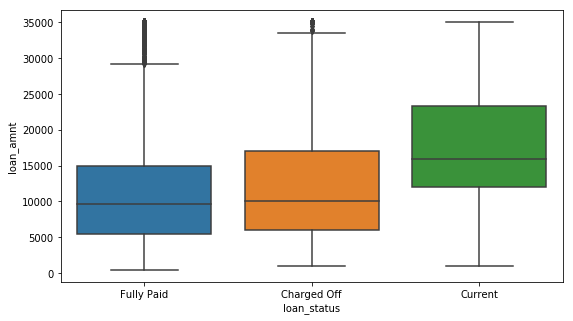

In [16]:
plt.figure(figsize=(9, 5))                                          #Analysed the current status of issued loans.
sns.boxplot(x='loan_status', y='loan_amnt', data=df_master)
plt.yscale('linear')
plt.show()

## `BOX PLOT` - Uni-Variant Analysis.

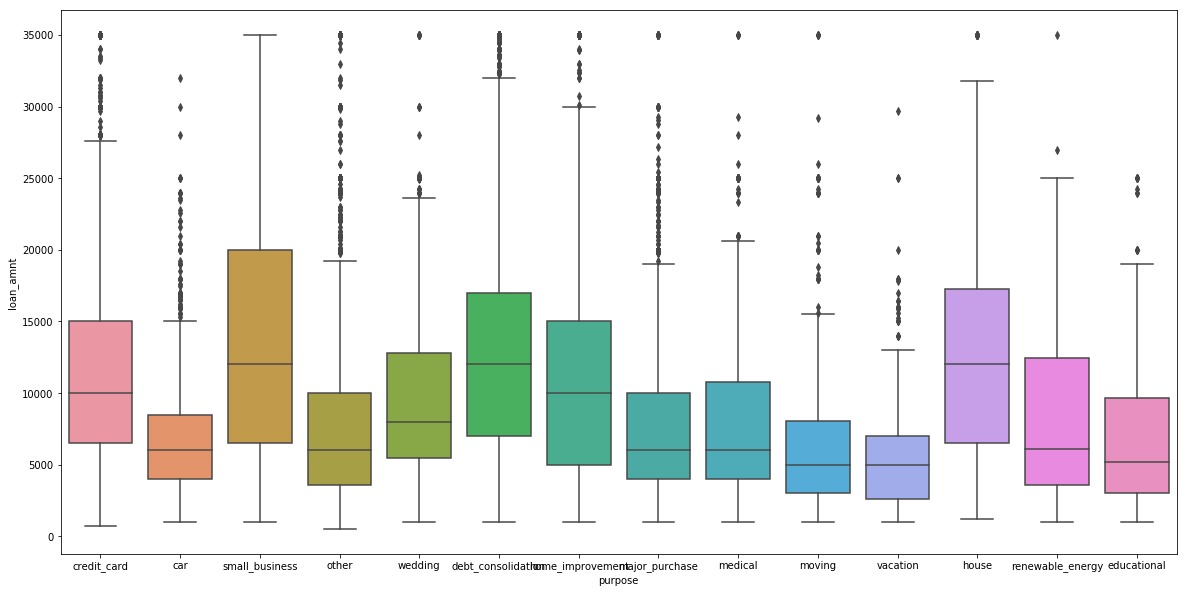

In [17]:
plt.figure(figsize=(20, 10))                    #Univariant Plot - to analysed issue loan under different category.
sns.boxplot(x='purpose', 
            y='loan_amnt', data=df_master)
plt.yscale('linear')
plt.show()

# Univariate Plots.

<font size="2" color ="blue" face="verdana" align =center>Bulk of the loans given were between 5k - 10k. Also, most loans were in multiples of $5,000 as seen in number of loans at 5,000, 10,000, 15,000, 20,000, 25,000, 30,000  and  35,000 points. 

# Bar Plot for loan distribution and  borrower behavior.

Most loans in the dataset were booked in 2011 followed by 2010. The lowest number of loans were booked in 2007.Let’s look at the count distribution in below plot.

- Highest number of issued loans are between $ 5k – $ 10K.
- Highest number of loans were issued for "Debit Consolidation"
- Maximum number of borrower has rented apartment. 
- Highest number of borrowers are with an employee length of 10+ years


C:\Users\122420\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'(%)')]

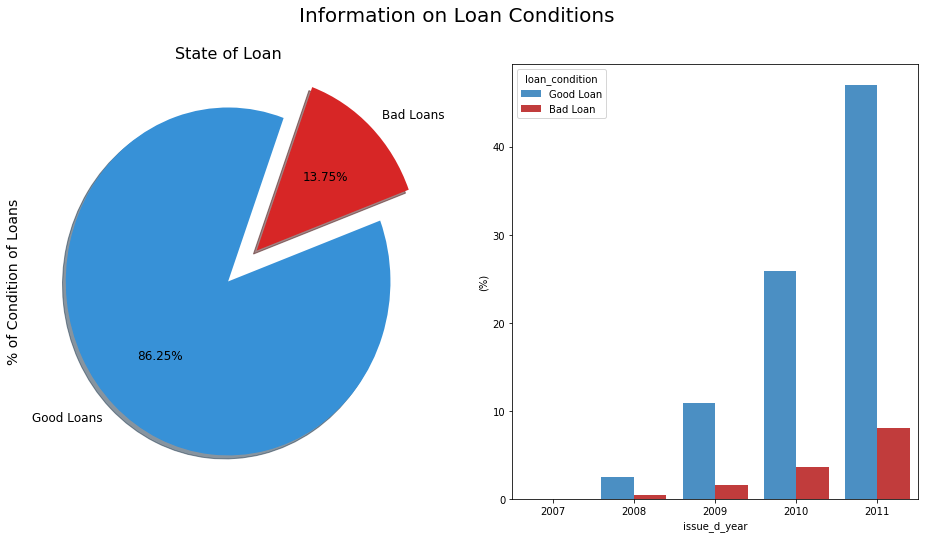

In [18]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"
plt.suptitle('Information on Loan Conditions', fontsize=20)

df_master["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', 
                                                    ax=ax[0], shadow=True, colors=colors, 
                                                    labels=labels, fontsize=12, startangle=70)

ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["#3791D7", "#D72626"]

sns.barplot(x="issue_d_year", y="loan_amnt", hue="loan_condition", 
            data=df_master, palette=palette, estimator=lambda x: len(x) / len(df_master) * 100)
ax[1].set(ylabel="(%)")

Text(0,0.5,'Loan Amount ($).')

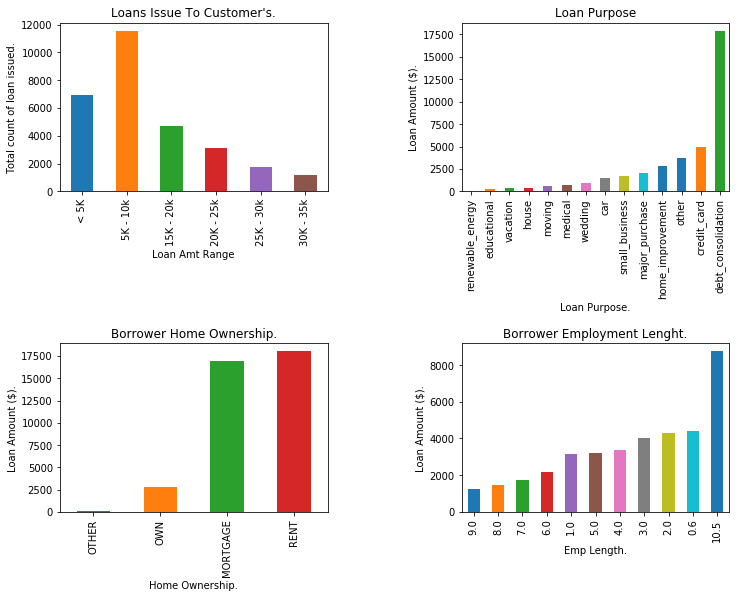

In [19]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.9)

df_loan_range=df_master.groupby('loan_catg')['loan_amnt'].size().sort_values(ascending=False)
category_order=["< 5K","5K - 10k","15K - 20k","20K - 25k","25K - 30k","30K - 35k"]
my_plot = df_loan_range[category_order].plot(kind='bar',stacked=True,                                  
                        title="Loans Issue To Customer's.",
                        figsize=(10, 9))
my_plot.set_xlabel("Loan Amt Range")
my_plot.set_ylabel("Total count of loan issued.")

plt.subplot(2,2,2)
df_loan_purpose = df_master.groupby(['purpose'])['loan_amnt'].size().sort_values(ascending=True)
my_plot = df_loan_purpose.plot(kind='bar', 
                                       title="Loan Purpose",
                                       figsize=(12, 9))
my_plot.set_xlabel("Loan Purpose.")
my_plot.set_ylabel("Loan Amount ($).")

plt.subplot(2,2,3)
df2 = df_master.groupby(['home_ownership'])['loan_amnt'].size().sort_values(ascending=True)
my_plot = df2.plot(kind='bar', 
                                       title="Borrower Home Ownership.",
                                       figsize=(12, 9))
my_plot.set_xlabel("Home Ownership.")
my_plot.set_ylabel("Loan Amount ($).")

plt.subplot(2,2,4)
df2 = df_master.groupby(['emp_length'])['loan_amnt'].size().sort_values(ascending=True)
my_plot = df2.plot(kind='bar', 
                                       title="Borrower Employment Lenght.",
                                       figsize=(12, 9))
my_plot.set_xlabel("Emp Length.")
my_plot.set_ylabel("Loan Amount ($).")

## Bar Plot loan distrubtion. 


- Max number of loans were issue in the month of Dec 2011. 

Text(0,0.5,'Loan Count.')

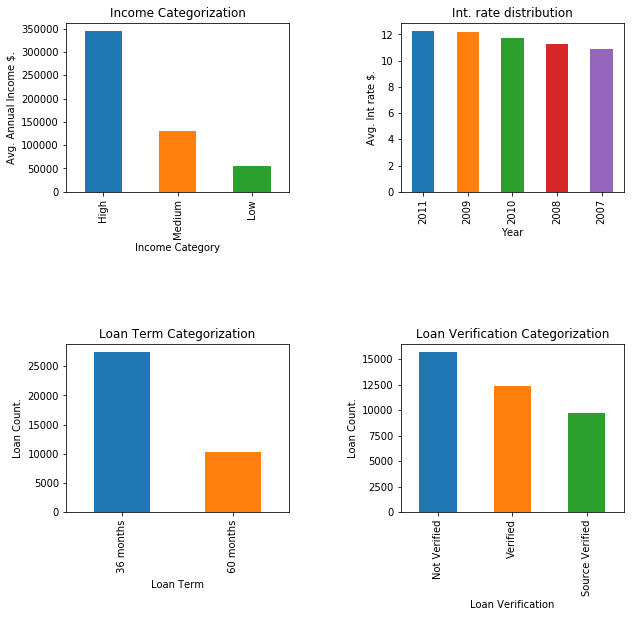

In [20]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.9)

df_loan_annual_inc=df_master.groupby(['income_category']).annual_inc.mean().sort_values(ascending=False)
my_plot = df_loan_annual_inc.plot(kind='bar',stacked=True,                                  
                        title="Income Categorization",
                        figsize=(10, 9))
my_plot.set_xlabel("Income Category")
my_plot.set_ylabel("Avg. Annual Income $.")

plt.subplot(2,2,2)
df_int_rate=df_master.groupby(['issue_d_year']).intt_rate.mean().sort_values(ascending=False)
my_plot = df_int_rate.plot(kind='bar',stacked=True,                                  
                        title="Int. rate distribution",
                        figsize=(10, 9))
my_plot.set_xlabel("Year")
my_plot.set_ylabel("Avg. Int rate $.")

plt.subplot(2,2,3)
df_ln_term=df_master.groupby(['term']).issue_d_year.size().sort_values(ascending=False)
my_plot = df_ln_term.plot(kind='bar',stacked=True,                                  
                        title="Loan Term Categorization",
                        figsize=(10, 9))
my_plot.set_xlabel("Loan Term")
my_plot.set_ylabel("Loan Count.")

plt.subplot(2,2,4)

df_ln_verf=df_master.groupby(['verification_status']).row_id.size().sort_values(ascending=False)
my_plot = df_ln_verf.plot(kind='bar',stacked=True,                                  
                        title="Loan Verification Categorization",
                        figsize=(10, 9))
my_plot.set_xlabel("Loan Verification")
my_plot.set_ylabel("Loan Count.")

### State wise Loan Distribution [Top 10 Charge Off | Paid Off] 

Text(0,0.5,'Loan Count.')

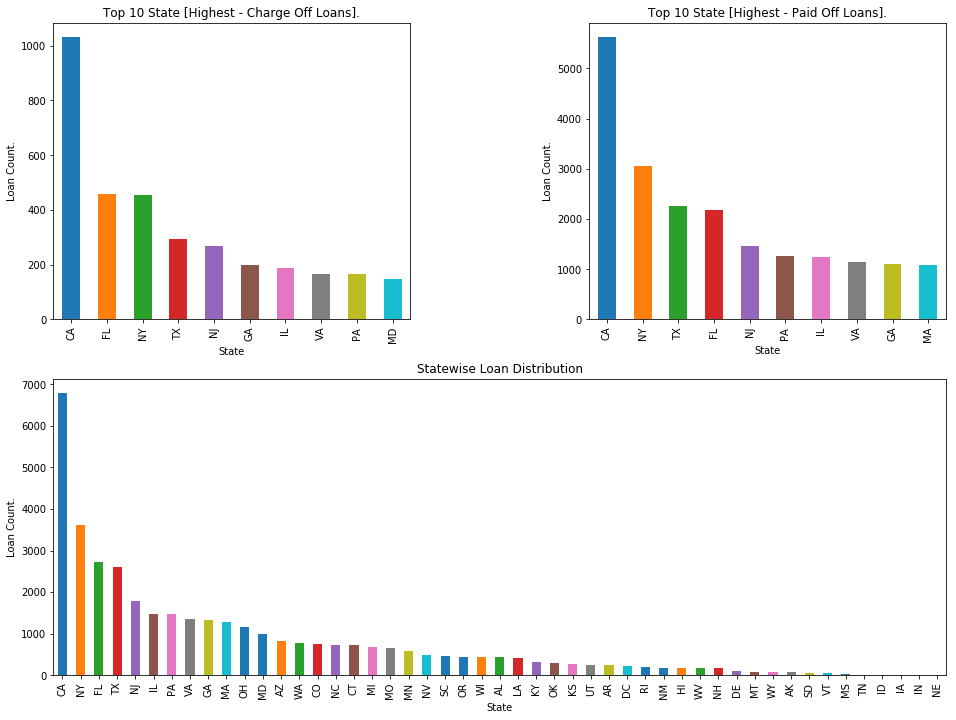

In [21]:
fig = plt.figure(figsize=(12,9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

ax1 = fig.add_subplot(221)
df_charge_off_plt=df_charge_off.groupby(['addr_state']).row_id.size().sort_values(ascending=False).nlargest(10)
my_plot = df_charge_off_plt.plot(kind='bar',stacked=True,                                  
                        title="Top 10 State [Highest - Charge Off Loans].")
my_plot.set_xlabel("State")
my_plot.set_ylabel("Loan Count.")

ax2 = fig.add_subplot(222)
df_paid_off_plt=df_fully_paid.groupby(['addr_state']).row_id.size().sort_values(ascending=False).nlargest(10)
#df_charge_off_plt.nlargest(10)
my_plot = df_paid_off_plt.plot(kind='bar',stacked=True,                                  
                        title="Top 10 State [Highest - Paid Off Loans].")
my_plot.set_xlabel("State")
my_plot.set_ylabel("Loan Count.")


ax3 = fig.add_subplot(212)
df_state_loan_annual_inc=df_master.groupby(['addr_state']).row_id.size().sort_values(ascending=False)
my_plot = df_state_loan_annual_inc.plot(kind='bar',stacked=True,                                  
                        title="Statewise Loan Distribution",
                        figsize=(16, 12))
my_plot.set_xlabel("State")
my_plot.set_ylabel("Loan Count.")


Text(0,0.5,'Loan Count.')

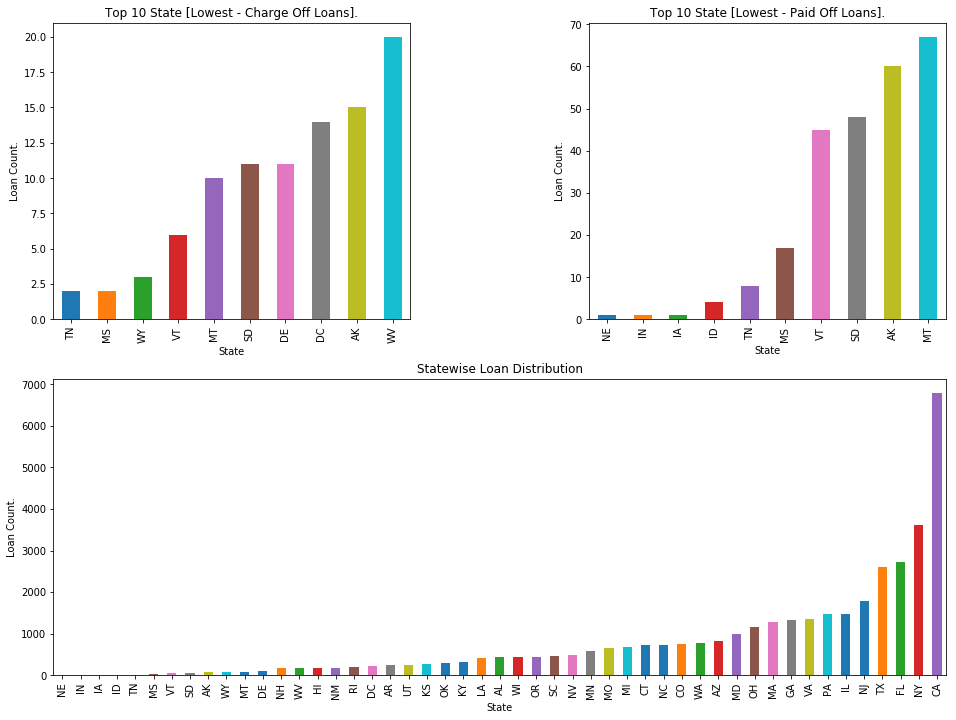

In [22]:
fig = plt.figure(figsize=(12,9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

ax1 = fig.add_subplot(221)
df_charge_off_plt_min=df_charge_off.groupby(['addr_state']).row_id.size().sort_values(ascending=True).head(10)
my_plot = df_charge_off_plt_min.plot(kind='bar',stacked=True,                                  
                        title="Top 10 State [Lowest - Charge Off Loans].")
my_plot.set_xlabel("State")
my_plot.set_ylabel("Loan Count.")

ax2 = fig.add_subplot(222)
df_paid_off_plt_min=df_fully_paid.groupby(['addr_state']).row_id.size().sort_values(ascending=True).head(10)
#df_charge_off_plt.nlargest(10)
my_plot = df_paid_off_plt_min.plot(kind='bar',stacked=True,                                  
                        title="Top 10 State [Lowest - Paid Off Loans].")
my_plot.set_xlabel("State")
my_plot.set_ylabel("Loan Count.")


ax3 = fig.add_subplot(212)
df_state_loan_annual_inc_min=df_master.groupby(['addr_state']).row_id.size().sort_values(ascending=True)
my_plot = df_state_loan_annual_inc_min.plot(kind='bar',stacked=True,                                  
                        title="Statewise Loan Distribution",
                        figsize=(16, 12))
my_plot.set_xlabel("State")
my_plot.set_ylabel("Loan Count.")


#### `Note: The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.`

C:\Users\122420\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total committed by Investors')

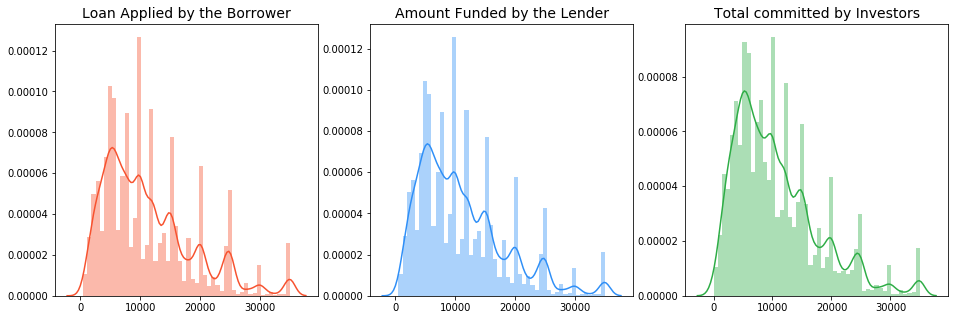

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
loan_amount = df_master["loan_amnt"].values
funded_amount = df_master["funded_amnt"].values
investor_funds = df_master["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)

sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)

sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)


## `Bar Plot` - Bi-Variant Analysis. 


Text(0,0.5,'Loan Count')

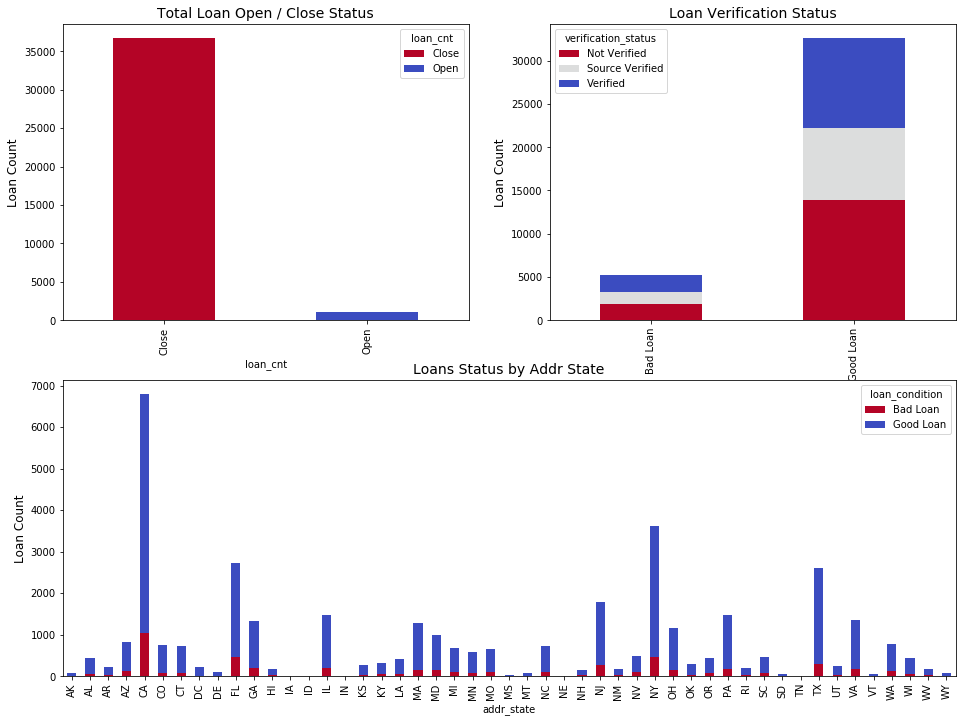

In [24]:

fig = plt.figure(figsize=(16,12))                    #Loan wise bivariant analysis.
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

df_loan_cnt = df_master.groupby(['loan_cnt', 'loan_cnt']).size()
df_loan_cnt.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Total Loan Open / Close Status', fontsize=14)
ax1.set_ylabel('Loan Count', fontsize=12)


df_loan_cnt = df_master.groupby(['loan_condition', 'verification_status']).size() 
df_loan_cnt.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Loan Verification Status', fontsize=14)
ax2.set_ylabel('Loan Count', fontsize=12)


#Loan by Status.
loans_by_state = df_master.groupby(['addr_state', 'loan_condition']).size()
loans_by_state.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax3, grid=False)
ax3.set_title('Loans Status by Addr State', fontsize=14)
ax3.set_ylabel('Loan Count', fontsize=12)


### Violin Plot : Income Category.

- Low income category: Borrowers that have an annual income lower or equal to 100,000.
- Medium income category: Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000.
- High income category: Borrowers that have an annual income higher tha 200,000 usd.

C:\Users\122420\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


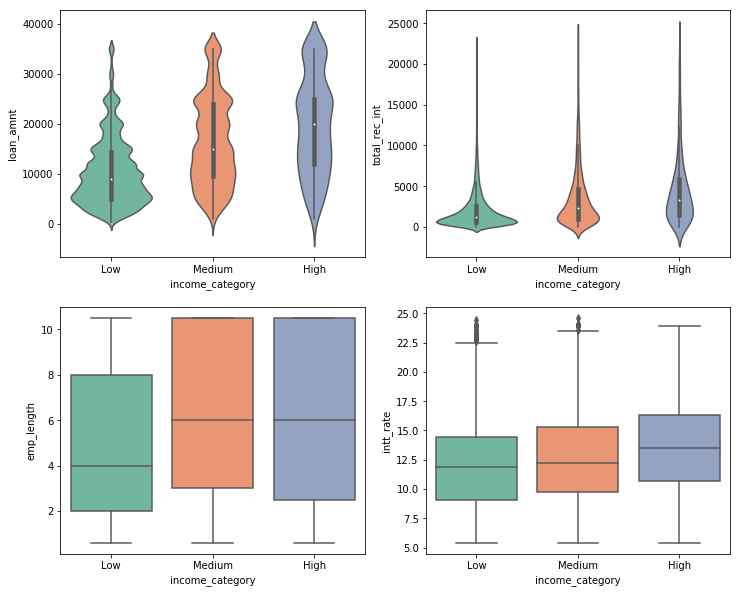

In [25]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(12,10))
sns.violinplot(x="income_category", y="loan_amnt", data=df_master, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="total_rec_int", data=df_master, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length", data=df_master, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="intt_rate", data=df_master, palette="Set2", ax=ax4)

Text(0,0.5,'Loan count')

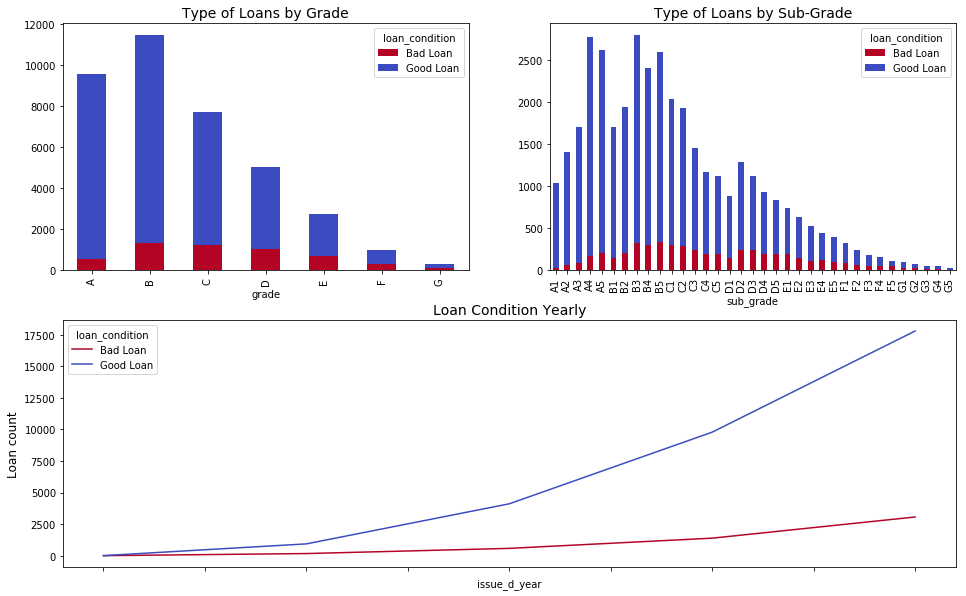

In [26]:
fig = plt.figure(figsize=(16,10))                #Loan condition & Distribution.
ax1 = fig.add_subplot(221)
cmap = plt.cm.coolwarm_r

df_ln_by_state = df_master.groupby(['grade', 'loan_condition']).size()
df_ln_by_state.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)

ax2 = fig.add_subplot(222)
df_ln_by_grade = df_master.groupby(['sub_grade', 'loan_condition']).size()
df_ln_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

ax3 = fig.add_subplot(212)
df_ln_by_int = df_master.groupby(['issue_d_year', 'loan_condition']).size()
df_ln_by_int.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Loan Condition Yearly', fontsize=14)
ax3.set_ylabel('Loan count', fontsize=12)

Text(0,0.5,'Interest Rate (%)')

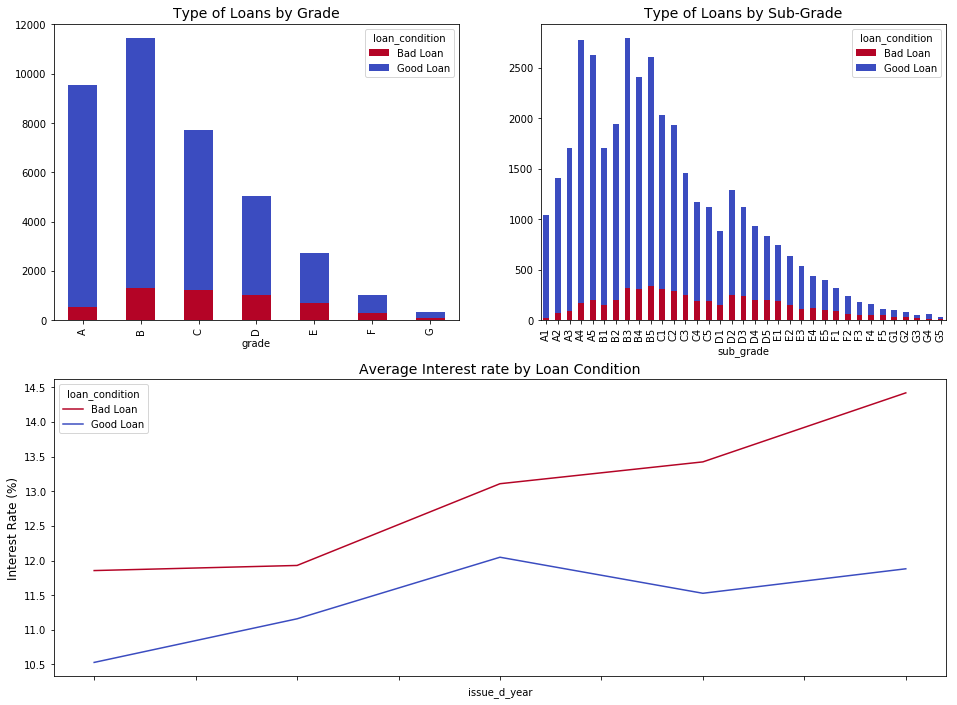

In [27]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
c = plt.cm.coolwarm_r
df_lns_by_county = df_master.groupby(['grade', 'loan_condition']).size()
df_lns_by_county.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)

ax2 = fig.add_subplot(222)
df_lns_by_grde = df_master.groupby(['sub_grade', 'loan_condition']).size()
df_lns_by_grde.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

ax3 = fig.add_subplot(212)
df_by_interest = df_master.groupby(['issue_d_year', 'loan_condition']).intt_rate.mean()
df_by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

C:\Users\122420\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


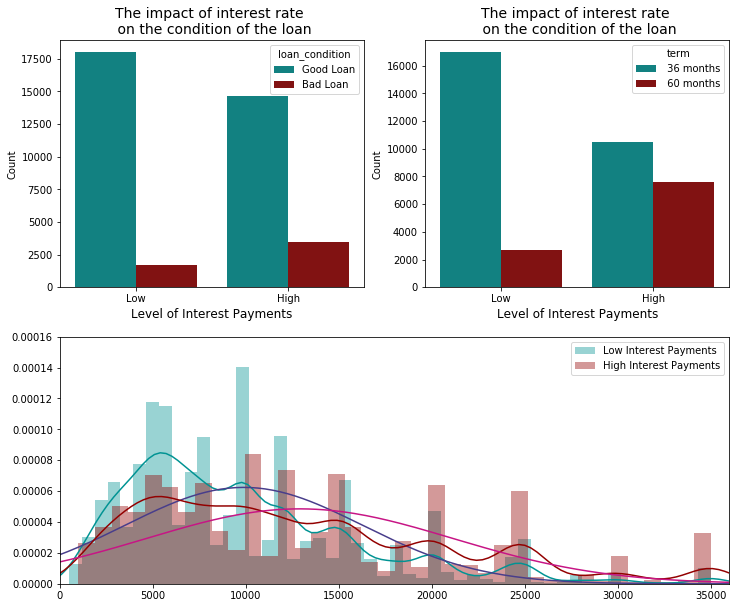

In [28]:
from scipy.stats import norm

plt.figure(figsize=(12,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='interest_payments', data=df_master, 
                  palette=palette, hue='loan_condition')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax = sns.countplot(x='interest_payments', data=df_master, 
                  palette=palette, hue='term')

ax.set_title('The impact of interest rate \n on the condition of the loan', fontsize=14)
ax.set_xlabel('Level of Interest Payments', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(212)
df_low_val = df_master['loan_amnt'].loc[df_master['interest_payments'] == 'Low'].values
df_high_val = df_master['loan_amnt'].loc[df_master['interest_payments'] == 'High'].values


ax3= sns.distplot(df_low_val, color='#009393', label='Low Interest Payments', fit=norm, fit_kws={"color":"#483d8b"}) 
ax3 = sns.distplot(df_high_val, color='#930000', label='High Interest Payments', fit=norm, fit_kws={"color":"#c71585"}) 
plt.axis([0, 36000, 0, 0.00016])
plt.legend()


C:\Users\122420\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


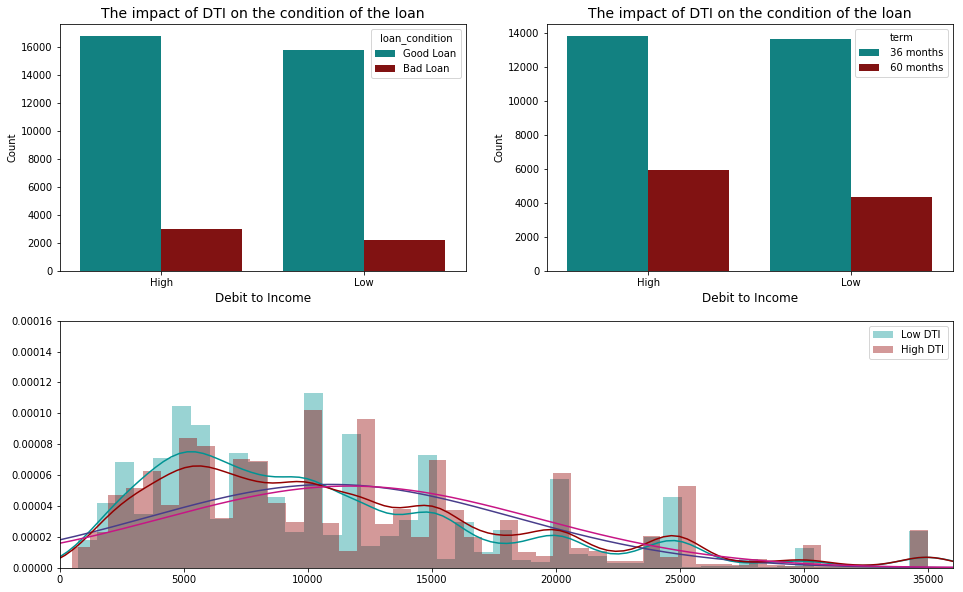

In [29]:
from scipy.stats import norm
plt.figure(figsize=(16,10))

palette = ['#009393', '#930000']
plt.subplot(221)
ax = sns.countplot(x='dti_status', data=df_master, 
                  palette=palette, hue='loan_condition')

ax.set_title('The impact of DTI on the condition of the loan', fontsize=14)
ax.set_xlabel('Debit to Income', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(222)
ax = sns.countplot(x='dti_status', data=df_master, 
                  palette=palette, hue='term')

ax.set_title('The impact of DTI on the condition of the loan', fontsize=14)
ax.set_xlabel('Debit to Income', fontsize=12)
ax.set_ylabel('Count')

plt.subplot(212)
df_low_val = df_master['loan_amnt'].loc[df_master['dti_status'] == 'Low'].values
df_high_val = df_master['loan_amnt'].loc[df_master['dti_status'] == 'High'].values


ax3= sns.distplot(df_low_val, color='#009393', label='Low DTI', fit=norm, fit_kws={"color":"#483d8b"}) 
ax3 = sns.distplot(df_high_val, color='#930000', label='High DTI', fit=norm, fit_kws={"color":"#c71585"}) 
plt.axis([0, 36000, 0, 0.00016])
plt.legend()


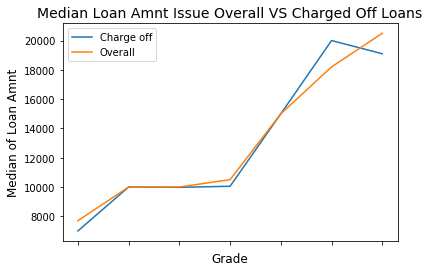

In [30]:
df_charge_off = df_master[(df_master.loan_status == "Charged Off")]  
df_grade = df_charge_off.groupby(['grade']).row_id.count()
df_Charged_mean_grade=df_charge_off.groupby(['grade'])['loan_amnt'].agg('median')
df_mean_grade=df_master.groupby(['grade'])['loan_amnt'].agg('median')
#df_mean_grade.describe()
ax=df_Charged_mean_grade.plot(label='Charge off')
df_mean_grade.plot(ax=ax,label='Overall')
ax.set_xlabel('Grade', fontsize=12)
ax.set_ylabel('Median of Loan Amnt', fontsize=12)
ax.set_title('Median Loan Amnt Issue Overall VS Charged Off Loans', fontsize=14)
plt.legend()